In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('combined_authors_with_affiliations.csv')

# Display the first few rows of the dataset
data.head()

,ID,Paper Title,Publication Year,Author Keywords,Article Citation Count,Authors with Affiliations
0,1,Semantically Enhanced Software Traceability Us...,2017,Traceability;Deep Learning;Recurrent Neural Ne...,147.0,"J. Guo (University of Notre Dame, IN, USA); J...."
1,2,Can Latent Topics in Source Code Predict Missi...,2017,Architectural design and implementation;tactic...,8.0,R. Gopalakrishnan (Rochester Institute of Tech...
2,3,Analyzing APIs Documentation and Code to Detec...,2017,API documentation;static analysis;natural lang...,66.0,"Y. Zhou (College of Computer Science, Nanjing ..."
3,4,An Unsupervised Approach for Discovering Relev...,2017,Application Programming Interface;PageRank Alg...,43.0,H. Jiang (State Key Laboratory of Software Eng...
4,5,Detecting User Story Information in Developer-...,2017,developer communication;user story generation;...,40.0,P. Rodeghero (Department of Computer Science a...


# Data Cleaning

In [ ]:

# Check for missing values
missing_data = data.isnull().sum()

# Check for duplicates
duplicate_rows = data.duplicated().sum()

missing_data, duplicate_rows

(ID                             0
 Paper Title                    0
 Publication Year               0
 Author Keywords               84
 Article Citation Count       374
 Authors with Affiliations      4
 dtype: int64,
 0)

In [ ]:
# Handling missing values

# 1. Replace missing values in 'Author Keywords' with "Unknown"
data['Author Keywords'].fillna("Unknown", inplace=True)

# 2. Replace missing values in 'Article Citation Count' with 0
data['Article Citation Count'].fillna(0, inplace=True)

# 3. Drop rows with missing 'Authors with Affiliations'
data.dropna(subset=['Authors with Affiliations'], inplace=True)

# Confirm that there are no more missing values
missing_data_after_cleaning = data.isnull().sum()

missing_data_after_cleaning


ID                           0
Paper Title                  0
Publication Year             0
Author Keywords              0
Article Citation Count       0
Authors with Affiliations    0
dtype: int64

Next, we categorize papers into time periods based on the 'Publication Year' column:

Pre-COVID (2017-2019)
During COVID (2020)
Post-COVID (2021-2023)

In [ ]:
# Categorize papers by time period

def categorize_time_period(year):
    if year < 2020:
        return "Pre-COVID"
    elif year == 2020:
        return "During COVID"
    else:
        return "Post-COVID"

data['Time Period'] = data['Publication Year'].apply(categorize_time_period)

# Display the distribution of papers across the time periods
time_period_distribution = data['Time Period'].value_counts()

time_period_distribution


Post-COVID      545
Pre-COVID       330
During COVID    129
Name: Time Period, dtype: int64

In [ ]:
import re

def extract_authors_affiliations(text):
    """
    Extract authors and affiliations from the 'Authors with Affiliations' column.
    """
    # Split by semicolon to separate individual authors with their affiliations
    author_affiliation_pairs = text.split(';')

    authors = []
    affiliations = []

    for pair in author_affiliation_pairs:
        # Extract author and affiliation using regex
        match = re.match(r'^(.*?)\s*\((.*?)\)$', pair.strip())
        if match:
            authors.append(match.group(1).strip())
            affiliations.append(match.group(2).strip())

    return authors, affiliations

# Apply the function to extract authors and affiliations
data['Authors'], data['Affiliations'] = zip(*data['Authors with Affiliations'].apply(extract_authors_affiliations))

# Display the first few rows with the new columns
data[['Authors', 'Affiliations']].head()


,Authors,Affiliations
0,"[J. Guo, J. Cheng, J. Cleland-Huang]","[University of Notre Dame, IN, USA, University..."
1,"[R. Gopalakrishnan, P. Sharma, M. Mirakhorli, ...","[Rochester Institute of Technology, USA, Roche..."
2,"[Y. Zhou, R. Gu, T. Chen, Z. Huang, S. Paniche...","[College of Computer Science, Nanjing Universi..."
3,"[H. Jiang, J. Zhang, Z. Ren, T. Zhang]","[State Key Laboratory of Software Engineering,..."
4,"[P. Rodeghero, S. Jiang, A. Armaly, C. McMillan]",[Department of Computer Science and Engineerin...


# Exploratory Data Analysis (EDA) to uncover insights and patterns from the dataset

## Temporal Analysis:

Distribution of papers across the time periods.
Average citation counts across the time periods.

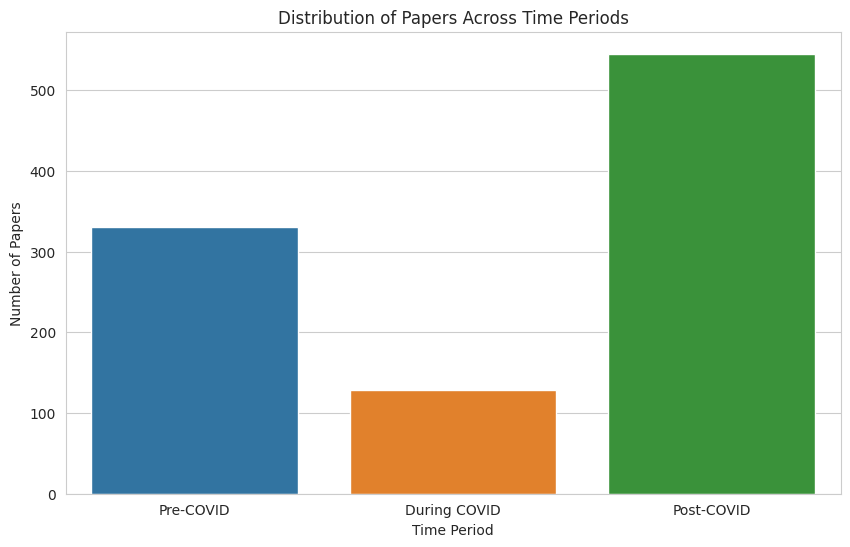

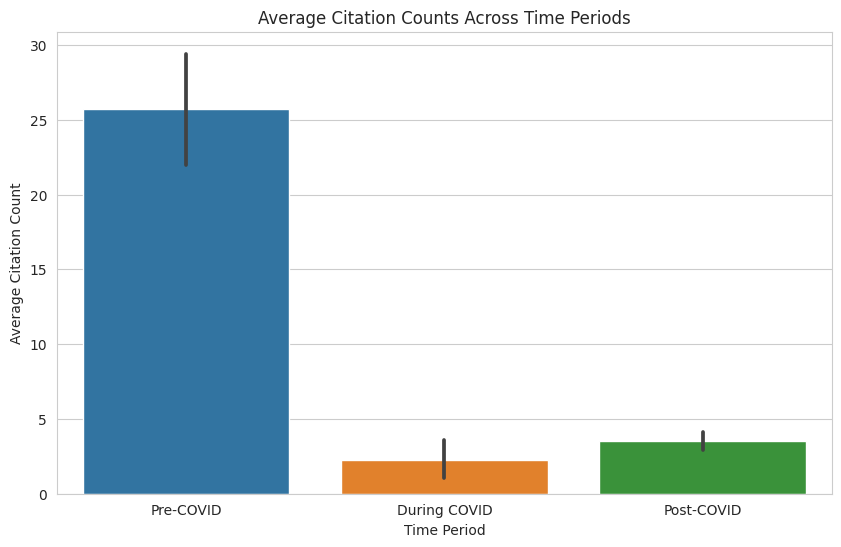

In [ ]:


# Set style for visualizations
sns.set_style("whitegrid")

# 1. Temporal Analysis

# Distribution of papers across the time periods
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Time Period', order=['Pre-COVID', 'During COVID', 'Post-COVID'])
plt.title('Distribution of Papers Across Time Periods')
plt.ylabel('Number of Papers')
plt.show()

# Average citation counts across the time periods
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Time Period', y='Article Citation Count', order=['Pre-COVID', 'During COVID', 'Post-COVID'])
plt.title('Average Citation Counts Across Time Periods')
plt.ylabel('Average Citation Count')
plt.show()


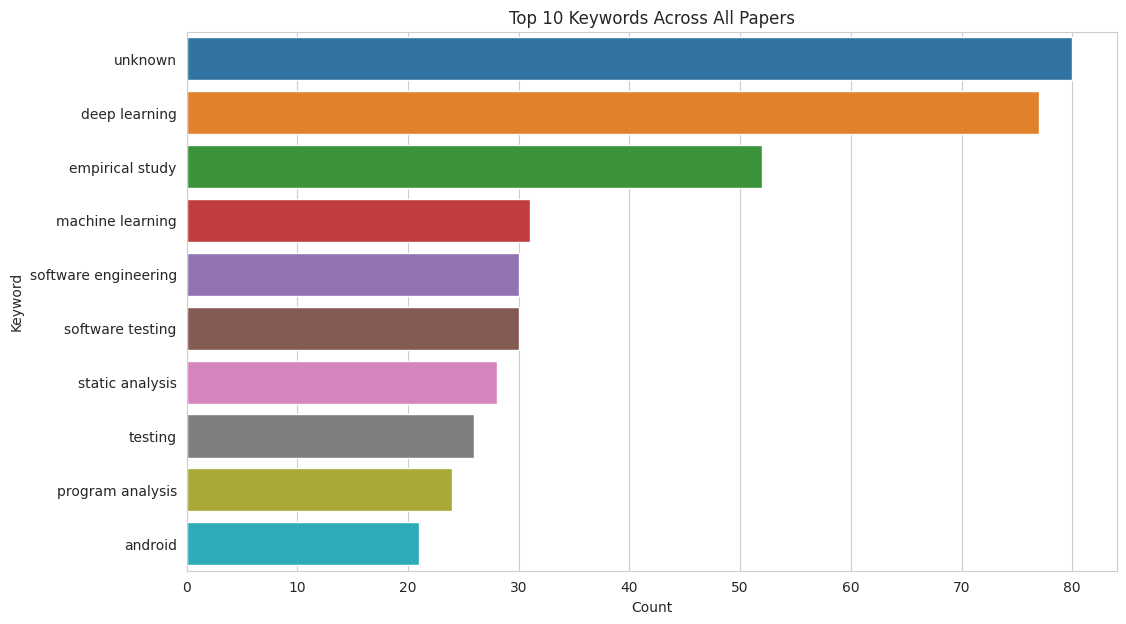

In [ ]:
from collections import Counter

# 2. Keyword Analysis

# Extract and count keywords across all papers
keywords_counter = Counter()
for keywords in data['Author Keywords']:
    for keyword in keywords.split(';'):
        keywords_counter[keyword.strip().lower()] += 1

# Top 10 keywords across all papers
top_keywords = keywords_counter.most_common(10)

# Plotting the top 10 keywords
plt.figure(figsize=(12, 7))
sns.barplot(x=[count for keyword, count in top_keywords],
            y=[keyword for keyword, count in top_keywords])
plt.title('Top 10 Keywords Across All Papers')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()


## Keyword Analysis Findings:

<ipython-input-9-caf8dcd47b26>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_over_time = keywords_over_time.append({
<ipython-input-9-caf8dcd47b26>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_over_time = keywords_over_time.append({
<ipython-input-9-caf8dcd47b26>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_over_time = keywords_over_time.append({
<ipython-input-9-caf8dcd47b26>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_over_time = keywords_over_time.append({
<ipython-input-9-caf8dcd47b26>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futu

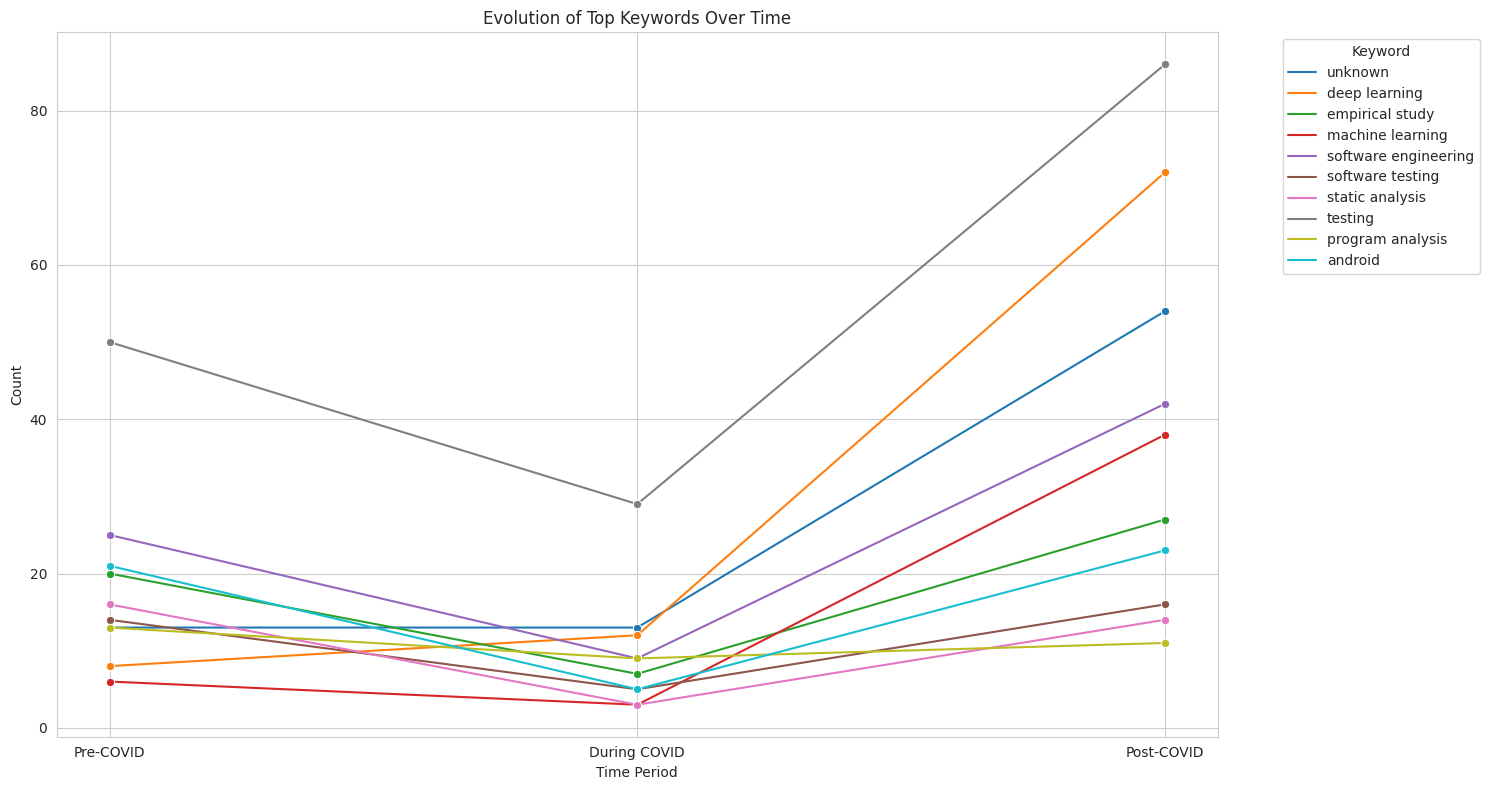

In [ ]:
# Evolution of top keywords over time

# Create a dataframe to track the count of top keywords across time periods
keywords_over_time = pd.DataFrame(columns=['Keyword', 'Time Period', 'Count'])

for keyword, _ in top_keywords:
    for period in ['Pre-COVID', 'During COVID', 'Post-COVID']:
        count = sum(data[data['Time Period'] == period]['Author Keywords'].str.contains(keyword, case=False, na=False))
        keywords_over_time = keywords_over_time.append({
            'Keyword': keyword,
            'Time Period': period,
            'Count': count
        }, ignore_index=True)

# Plotting the evolution of top keywords over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=keywords_over_time, x='Time Period', y='Count', hue='Keyword', marker="o")
plt.title('Evolution of Top Keywords Over Time')
plt.ylabel('Count')
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Evolution of Top Keywords Over Time

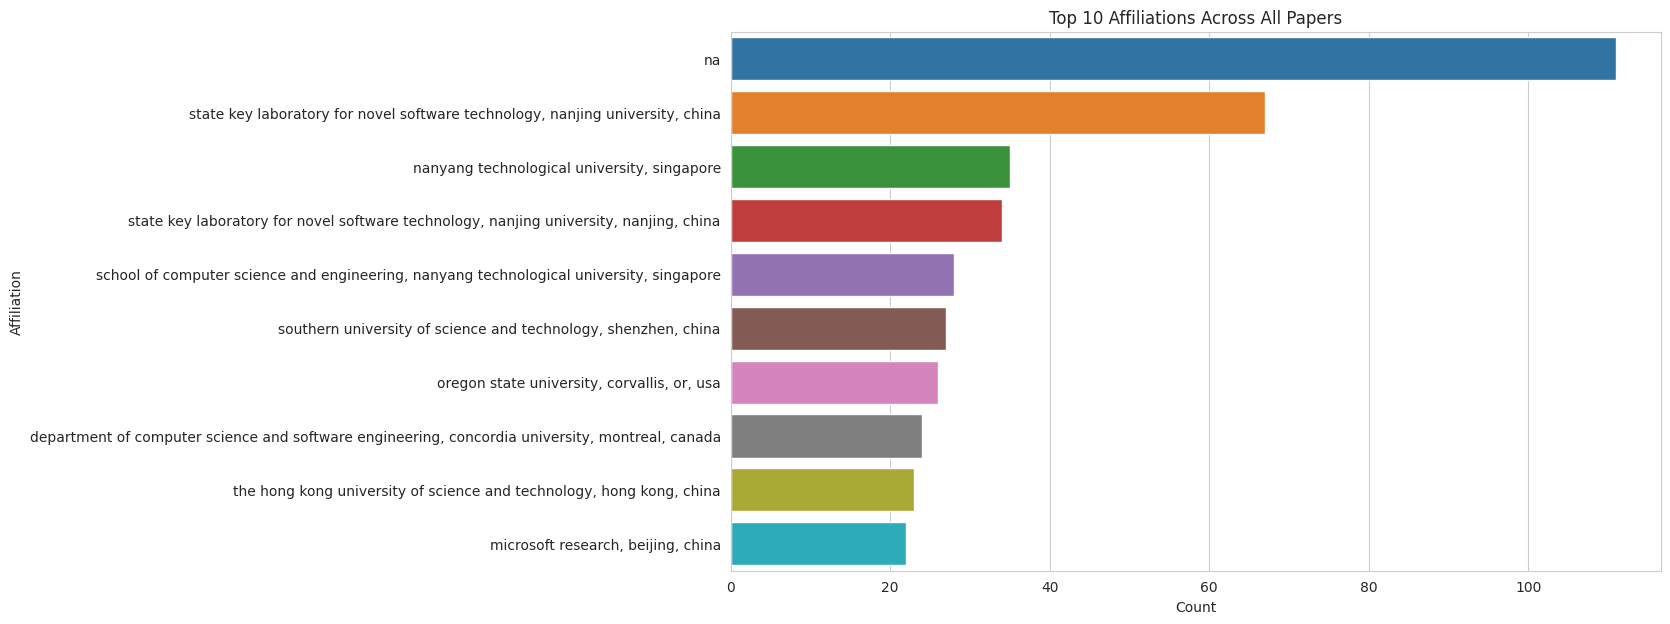

In [ ]:
# 3. Affiliation Analysis

# Extract and count affiliations across all papers
affiliations_counter = Counter()
for affiliations in data['Affiliations']:
    for affiliation in affiliations:
        affiliations_counter[affiliation.lower()] += 1

# Top 10 affiliations across all papers
top_affiliations = affiliations_counter.most_common(10)

# Plotting the top 10 affiliations
plt.figure(figsize=(12, 7))
sns.barplot(x=[count for affiliation, count in top_affiliations],
            y=[affiliation for affiliation, count in top_affiliations])
plt.title('Top 10 Affiliations Across All Papers')
plt.xlabel('Count')
plt.ylabel('Affiliation')
plt.show()


## Distribution of citation counts


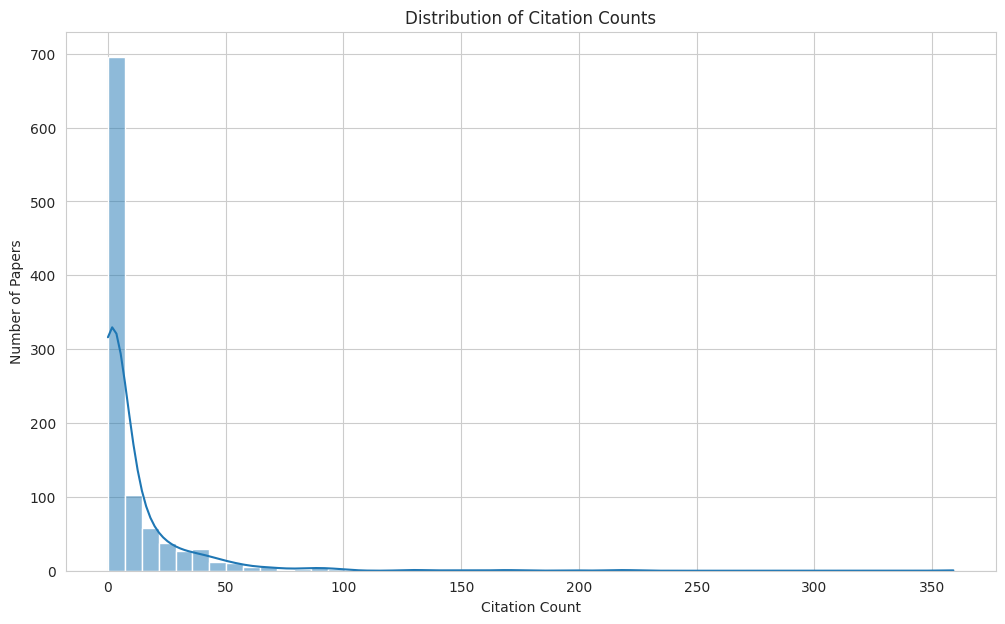

,Paper Title,Article Citation Count
102,DeepTest: Automated Testing of Deep-Neural-Net...,359.0
53,Evaluating and Improving Fault Localization,221.0
235,A Novel Neural Source Code Representation Base...,216.0
257,Guiding Deep Learning System Testing Using Sur...,196.0
185,Deep Code Search,172.0


In [ ]:
# 4. Citation Analysis

# Distribution of citation counts
plt.figure(figsize=(12, 7))
sns.histplot(data=data, x='Article Citation Count', bins=50, kde=True)
plt.title('Distribution of Citation Counts')
plt.xlabel('Citation Count')
plt.ylabel('Number of Papers')
plt.show()

# Papers with the highest citation counts
top_cited_papers = data.sort_values(by='Article Citation Count', ascending=False).head(5)
top_cited_papers[['Paper Title', 'Article Citation Count']]


## Keyword Analysis to identify the most common keywords in each time period

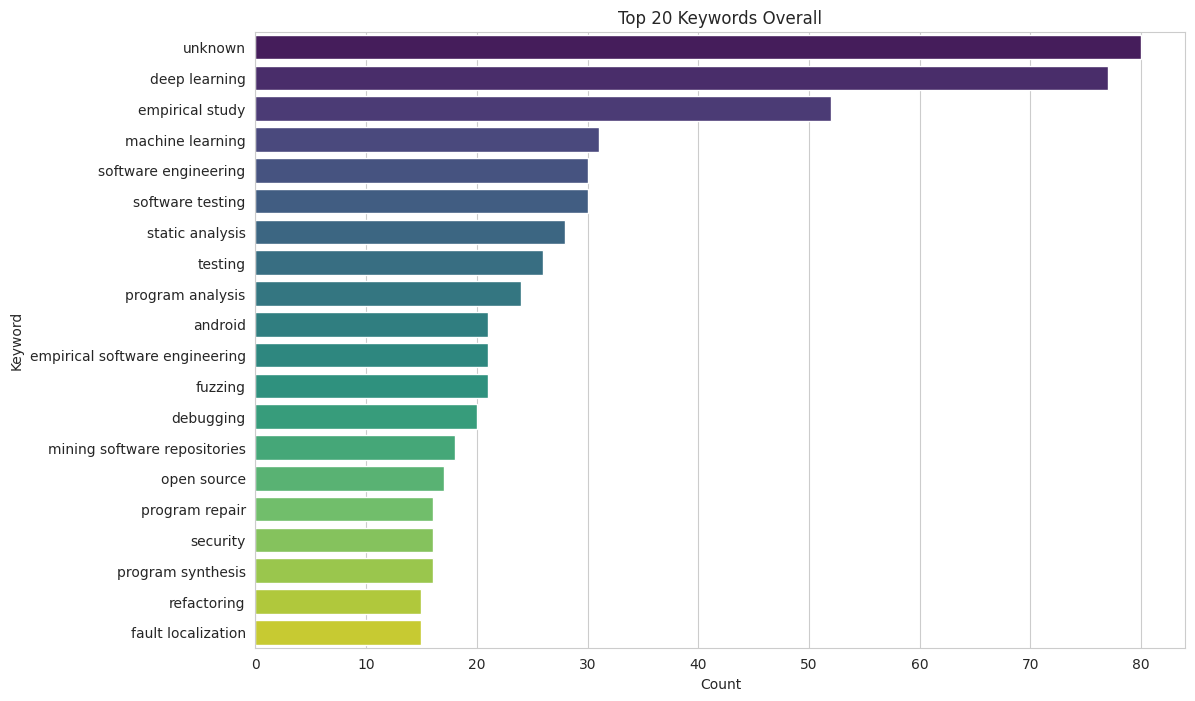

In [ ]:
from collections import Counter

# 3. Keyword Analysis

# Extract keywords from the 'Author Keywords' column and count their occurrences
def extract_keywords(keywords):
    return [keyword.strip().lower() for keyword in keywords.split(';')]

keywords_list = data['Author Keywords'].apply(extract_keywords).explode().tolist()
keyword_counts = Counter(keywords_list)

# Top 20 keywords overall
top_keywords = keyword_counts.most_common(20)

# Plot top 20 keywords
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for _, count in top_keywords], y=[keyword for keyword, _ in top_keywords], palette='viridis')
plt.title('Top 20 Keywords Overall')
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.show()


## Distribution of affiliations to identify prominent institutions and understand the number of papers per institution.

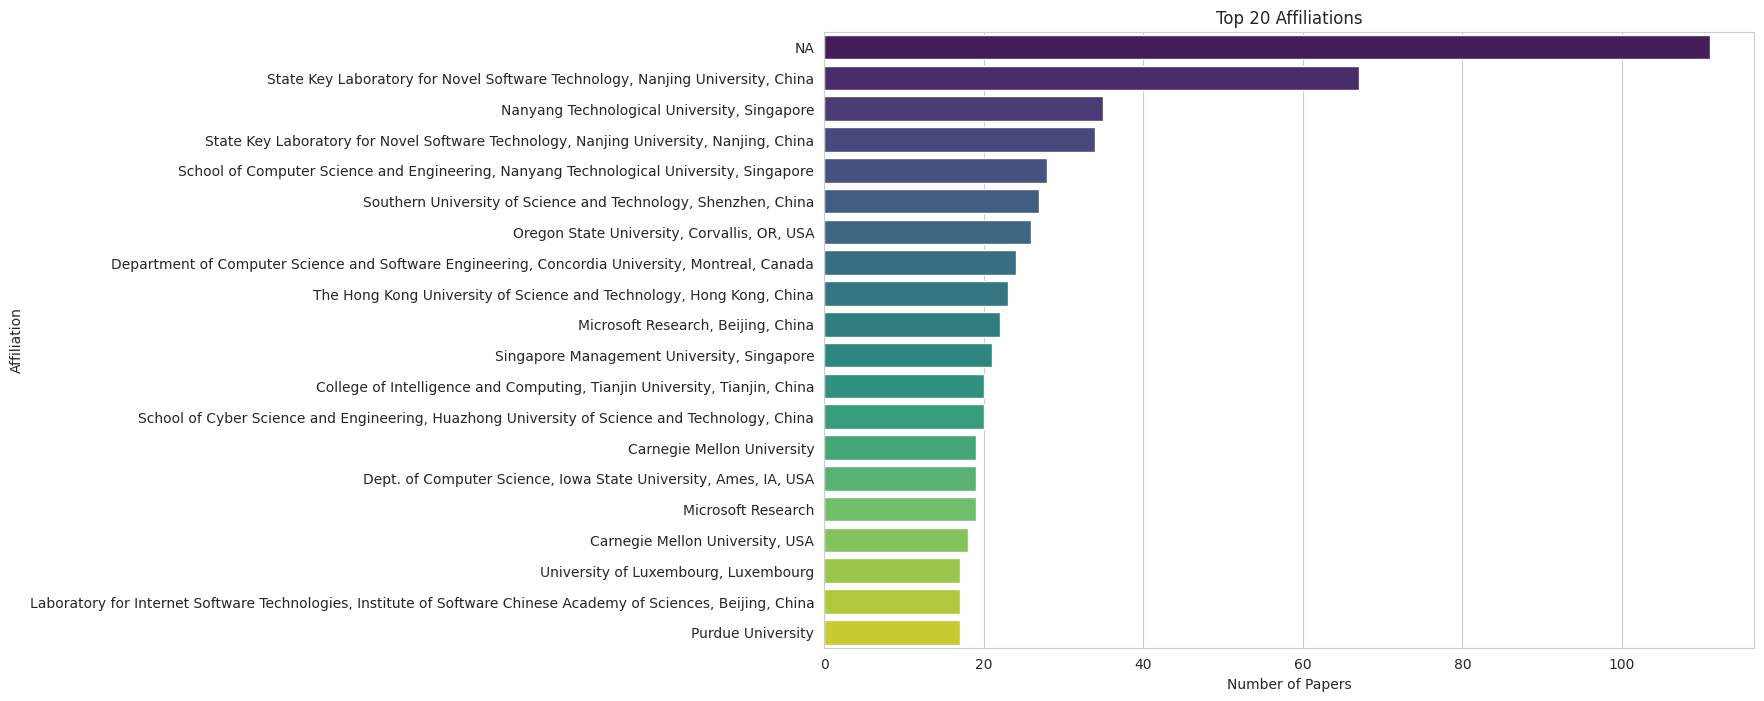

In [ ]:
# 4. Affiliation Analysis

# Extract affiliations and count their occurrences
affiliations_list = data['Affiliations'].explode().tolist()
affiliation_counts = Counter(affiliations_list)

# Top 20 affiliations
top_affiliations = affiliation_counts.most_common(20)

# Plot top 20 affiliations
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for _, count in top_affiliations], y=[affiliation for affiliation, _ in top_affiliations], palette='viridis')
plt.title('Top 20 Affiliations')
plt.xlabel('Number of Papers')
plt.ylabel('Affiliation')
plt.show()


## Author Analysis to understand the distribution of papers per author and identify authors with the most publications

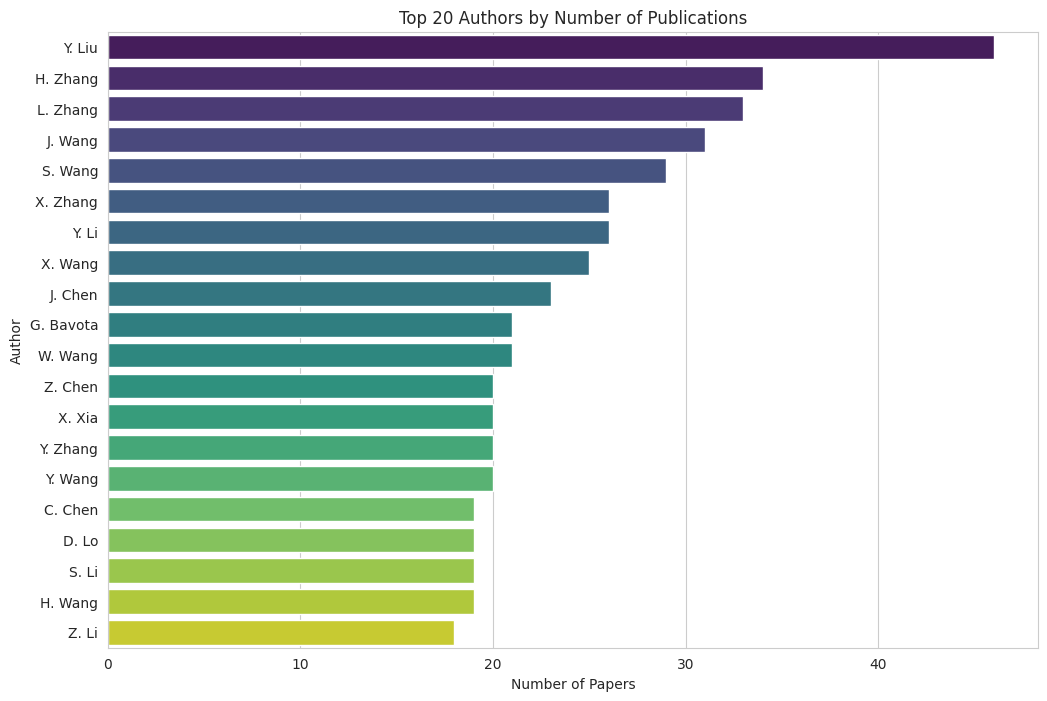

In [ ]:
# 5. Author Analysis

# Extract authors and count their occurrences
authors_list = data['Authors'].explode().tolist()
author_counts = Counter(authors_list)

# Top 20 authors
top_authors = author_counts.most_common(20)

# Plot top 20 authors
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for _, count in top_authors], y=[author for author, _ in top_authors], palette='viridis')
plt.title('Top 20 Authors by Number of Publications')
plt.xlabel('Number of Papers')
plt.ylabel('Author')
plt.show()


## Time-Based Citation Analysis




*   Average citations per paper across time periods.

*   Distribution of citations for each year.



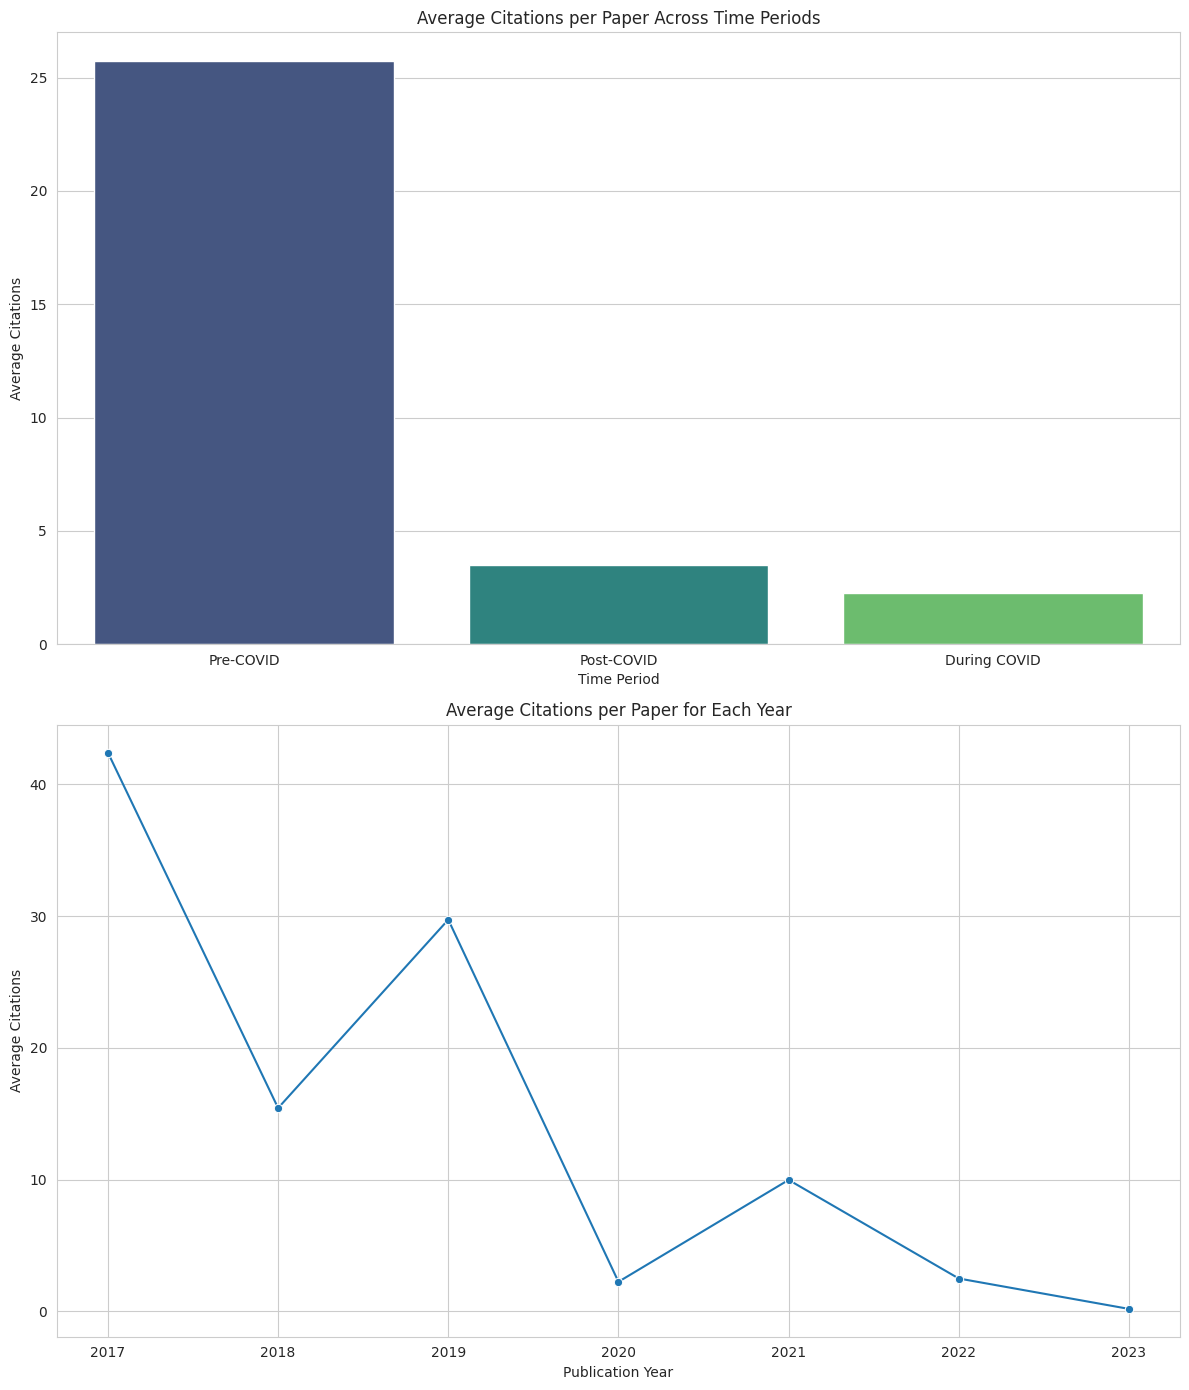

In [ ]:
# 1. Time-Based Citation Analysis

# a. Average citations per paper across time periods
avg_citations_time_period = data.groupby('Time Period')['Article Citation Count'].mean().sort_values(ascending=False)

# b. Distribution of citations for each year
avg_citations_yearly = data.groupby('Publication Year')['Article Citation Count'].mean()

# Plotting
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 14))

# Average citations per paper across time periods
sns.barplot(x=avg_citations_time_period.index, y=avg_citations_time_period.values, ax=ax[0], palette='viridis')
ax[0].set_title('Average Citations per Paper Across Time Periods')
ax[0].set_ylabel('Average Citations')

# Distribution of citations for each year
sns.lineplot(x=avg_citations_yearly.index, y=avg_citations_yearly.values, ax=ax[1], marker='o')
ax[1].set_title('Average Citations per Paper for Each Year')
ax[1].set_ylabel('Average Citations')

plt.tight_layout()
plt.show()


## Temporal Keyword Trends to identify the most popular keywords for each time period

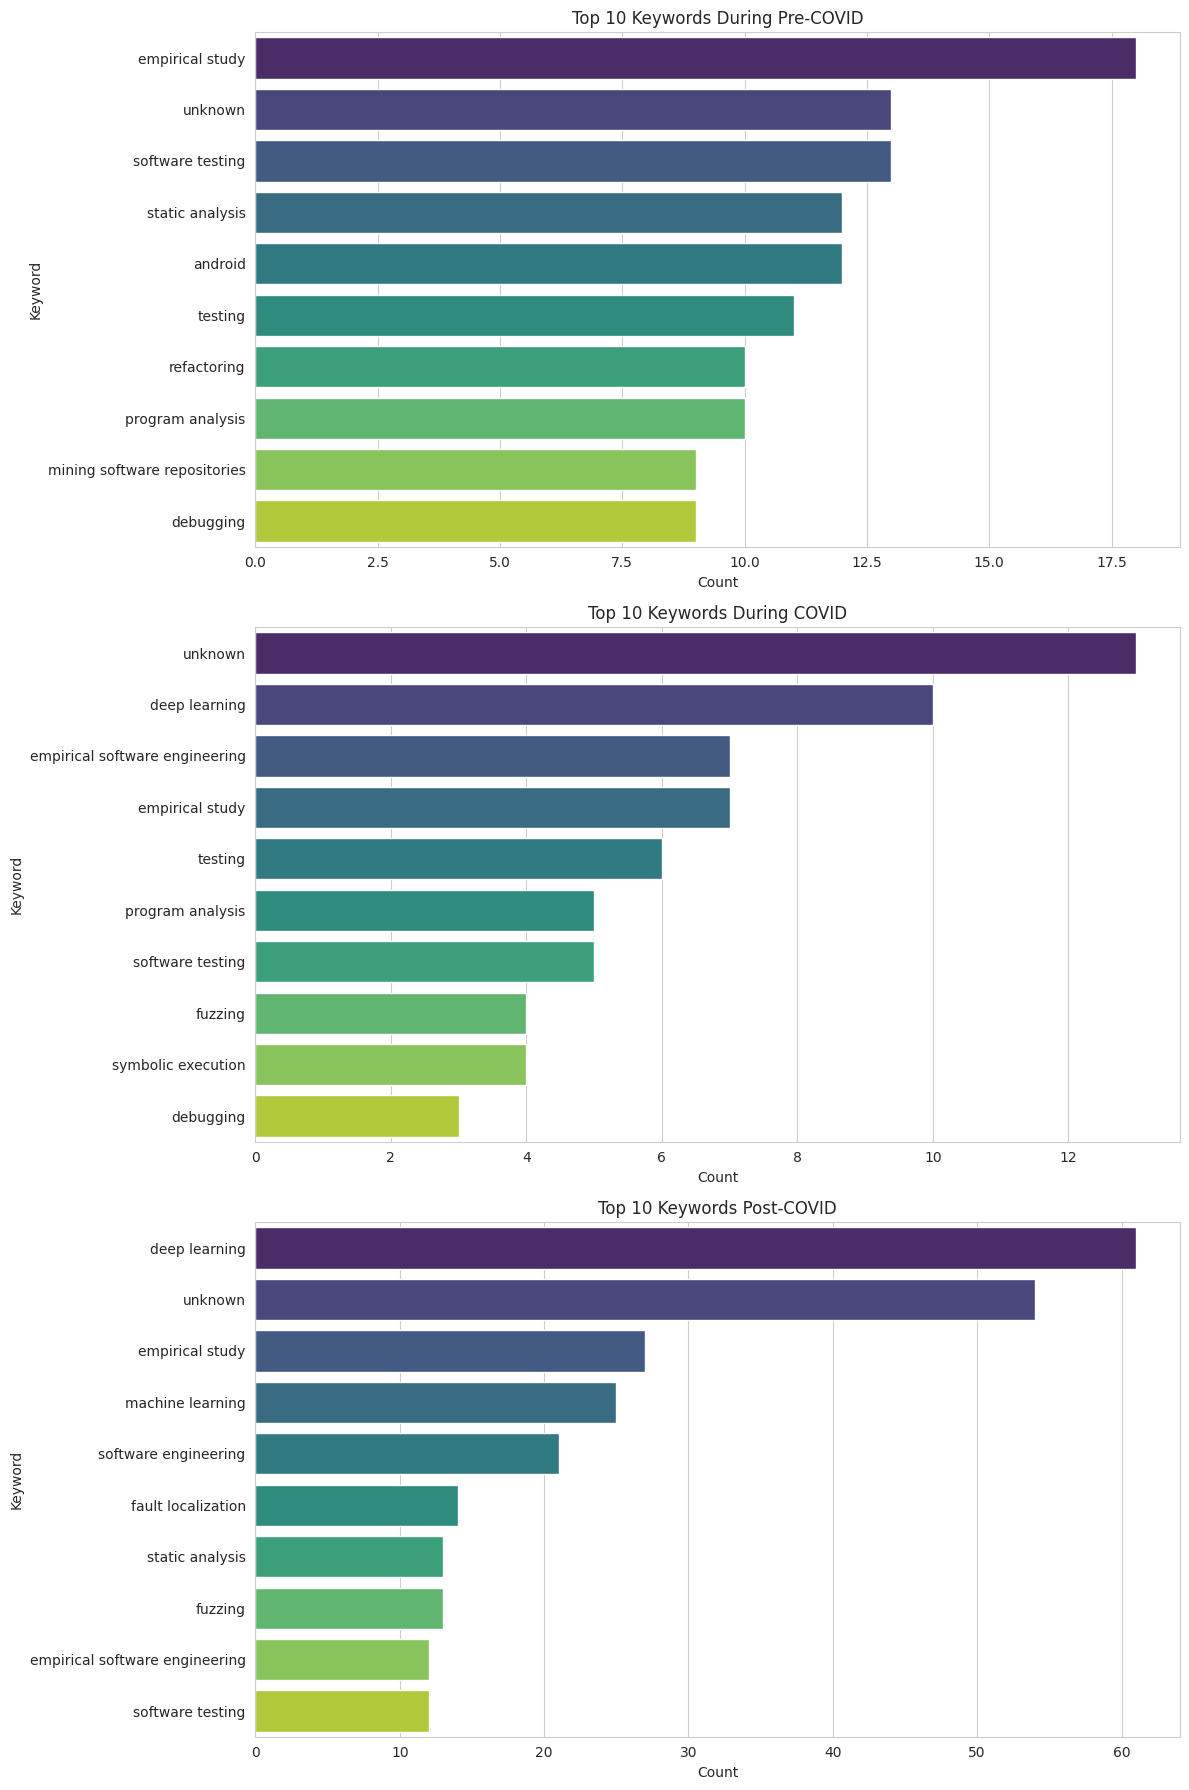

In [ ]:
# 2. Temporal Keyword Trends

# Function to get top keywords for each time period
def top_keywords_for_period(data, period, top_n=10):
    keywords_list = data[data['Time Period'] == period]['Author Keywords'].apply(extract_keywords).explode().tolist()
    keyword_counts = Counter(keywords_list)
    return keyword_counts.most_common(top_n)

# Get top keywords for each time period
pre_covid_keywords = top_keywords_for_period(data, 'Pre-COVID')
during_covid_keywords = top_keywords_for_period(data, 'During COVID')
post_covid_keywords = top_keywords_for_period(data, 'Post-COVID')

# Plot top keywords for each time period
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Pre-COVID Keywords
sns.barplot(x=[count for _, count in pre_covid_keywords], y=[keyword for keyword, _ in pre_covid_keywords], ax=axs[0], palette='viridis')
axs[0].set_title('Top 10 Keywords During Pre-COVID')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Keyword')

# During COVID Keywords
sns.barplot(x=[count for _, count in during_covid_keywords], y=[keyword for keyword, _ in during_covid_keywords], ax=axs[1], palette='viridis')
axs[1].set_title('Top 10 Keywords During COVID')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Keyword')

# Post-COVID Keywords
sns.barplot(x=[count for _, count in post_covid_keywords], y=[keyword for keyword, _ in post_covid_keywords], ax=axs[2], palette='viridis')
axs[2].set_title('Top 10 Keywords Post-COVID')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Keyword')

plt.tight_layout()
plt.show()


## Geographic Distribution Analysis

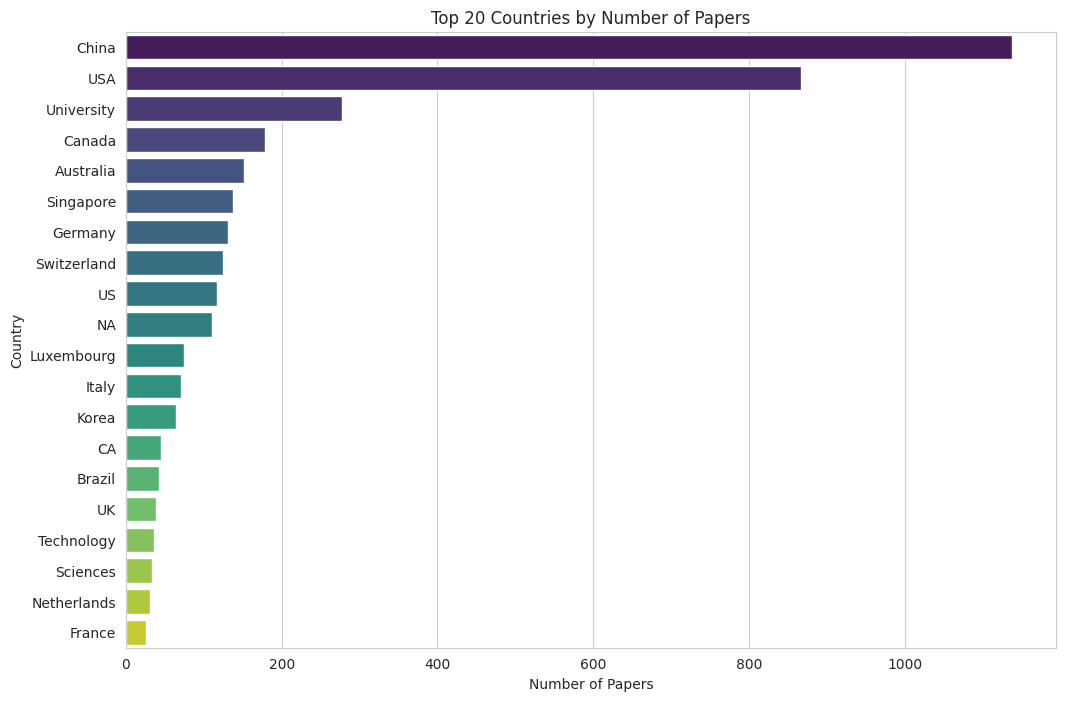

In [ ]:
# 4. Geographic Distribution Analysis

# Extract countries from affiliations using a simple heuristic (last word in the affiliation string)
# Note: This method may not be 100% accurate, but it provides a starting point for analysis
data['Countries'] = data['Affiliations'].apply(lambda x: [affiliation.split()[-1] for affiliation in x])

# Count occurrences of countries
countries_list = data['Countries'].explode().tolist()
country_counts = Counter(countries_list)

# Top 20 countries
top_countries = country_counts.most_common(20)

# Plot top 20 countries
plt.figure(figsize=(12, 8))
sns.barplot(x=[count for _, count in top_countries], y=[country for country, _ in top_countries], palette='viridis')
plt.title('Top 20 Countries by Number of Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Country')
plt.show()


## Distribution of Single vs. Multi-Author Papers

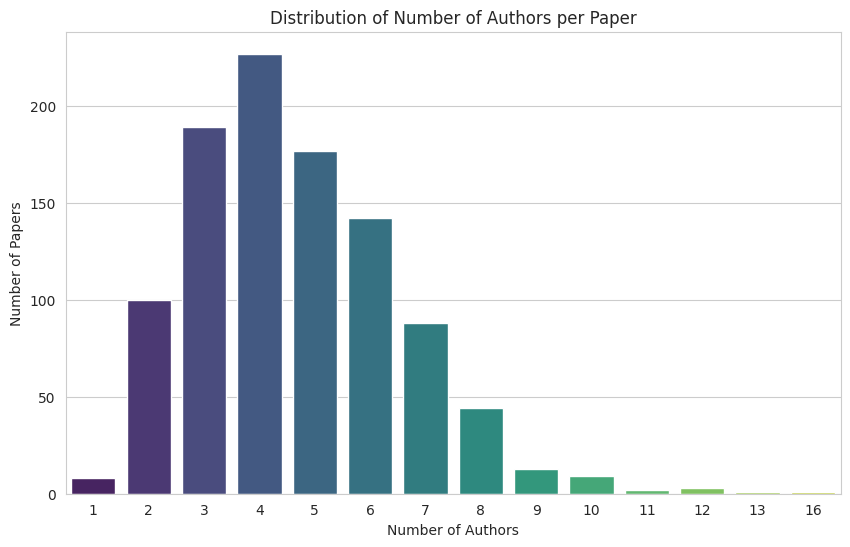

In [ ]:
# 1. Distribution of Single vs. Multi-Author Papers

# Calculate the number of authors per paper
data['Num_Authors'] = data['Authors'].apply(len)

# Plot distribution of number of authors per paper
plt.figure(figsize=(10, 6))
sns.countplot(x='Num_Authors', data=data, palette='viridis')
plt.title('Distribution of Number of Authors per Paper')
plt.ylabel('Number of Papers')
plt.xlabel('Number of Authors')
plt.show()


## Yearly Citation Trends

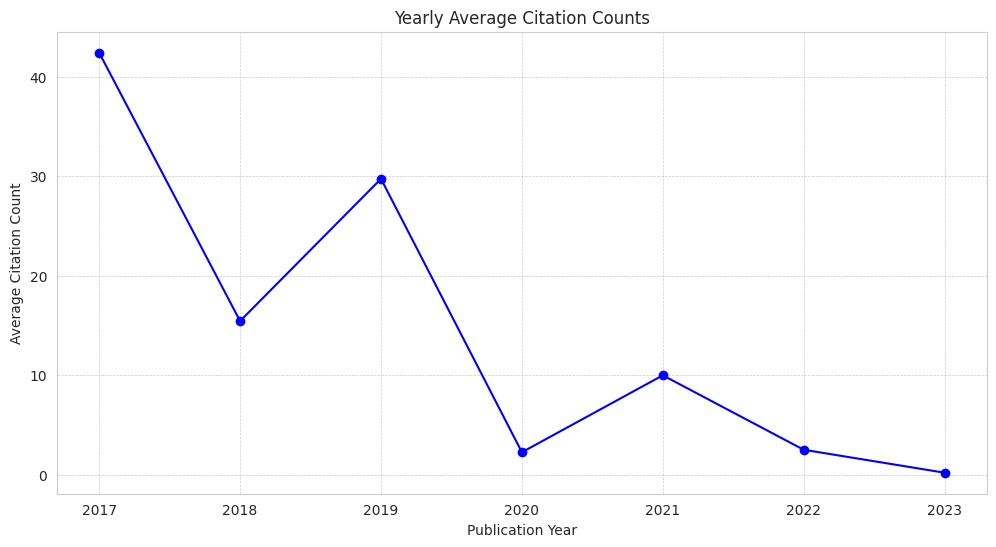

In [ ]:
# 2. Yearly Citation Trends

# Calculate average citation counts for each publication year
yearly_citations = data.groupby('Publication Year')['Article Citation Count'].mean()

# Plot yearly citation trends
plt.figure(figsize=(12, 6))
yearly_citations.plot(kind='line', marker='o', color='blue')
plt.title('Yearly Average Citation Counts')
plt.ylabel('Average Citation Count')
plt.xlabel('Publication Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Affiliation Diversity per Paper

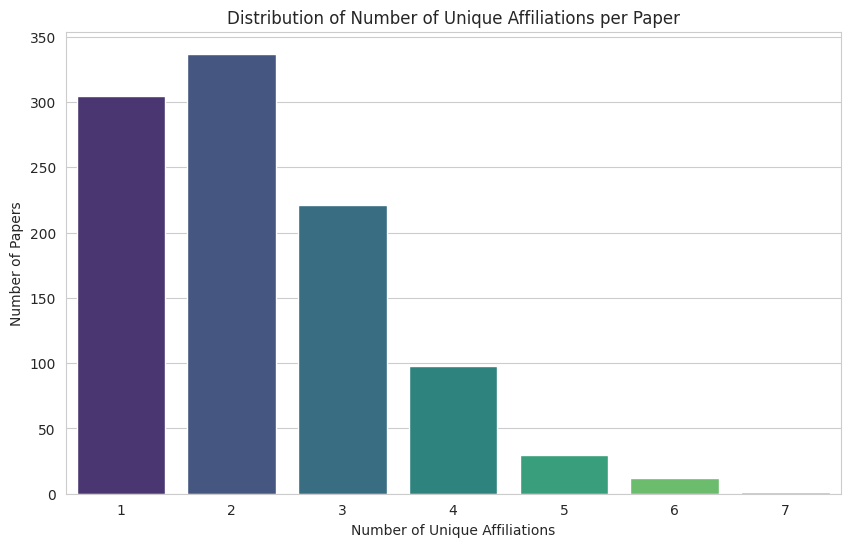

In [ ]:
# 3. Affiliation Diversity per Paper

# Calculate the number of unique affiliations per paper
data['Num_Unique_Affiliations'] = data['Affiliations'].apply(lambda x: len(set(x)))

# Plot distribution of number of unique affiliations per paper
plt.figure(figsize=(10, 6))
sns.countplot(x='Num_Unique_Affiliations', data=data, palette='viridis')
plt.title('Distribution of Number of Unique Affiliations per Paper')
plt.ylabel('Number of Papers')
plt.xlabel('Number of Unique Affiliations')
plt.show()


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (stopwords and wordnet)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    # Tokenization and lowercasing
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens, and apply lemmatization
    return ' '.join([lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words])

# Preprocess titles
data['Processed Titles'] = data['Paper Title'].apply(preprocess_text)

# Vectorize the processed titles
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000)
X = vectorizer.fit_transform(data['Processed Titles'])

# Train LDA model
num_topics = 5
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42).fit(X)

# Extract top keywords for each topic
def get_top_keywords_for_topic(model, feature_names, n_words):
    keywords_for_topics = {}
    for topic_idx, topic in enumerate(model.components_):
        keywords_for_topics[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
    return keywords_for_topics

feature_names = vectorizer.get_feature_names_out()
top_keywords = get_top_keywords_for_topic(lda_model, feature_names, 10)

top_keywords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{0: ['code',
  'study',
  'empirical',
  'source',
  'review',
  'software',
  'vulnerability',
  'open',
  'security',
  'android'],
 1: ['learning',
  'software',
  'deep',
  'system',
  'code',
  'model',
  'via',
  'test',
  'analysis',
  'neural'],
 2: ['software',
  'developer',
  'program',
  'data',
  'execution',
  'automated',
  'analysis',
  'library',
  'symbolic',
  'study'],
 3: ['testing',
  'android',
  'api',
  'detecting',
  'analysis',
  'apps',
  'via',
  'graph',
  'detection',
  'differential'],
 4: ['program',
  'repair',
  'automated',
  'generation',
  'test',
  'first',
  'journal',
  'mobile',
  'approach',
  'model']}